In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [45]:
data= pd.read_csv('IRIS.csv')

In [46]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
print(data['species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [51]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [52]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

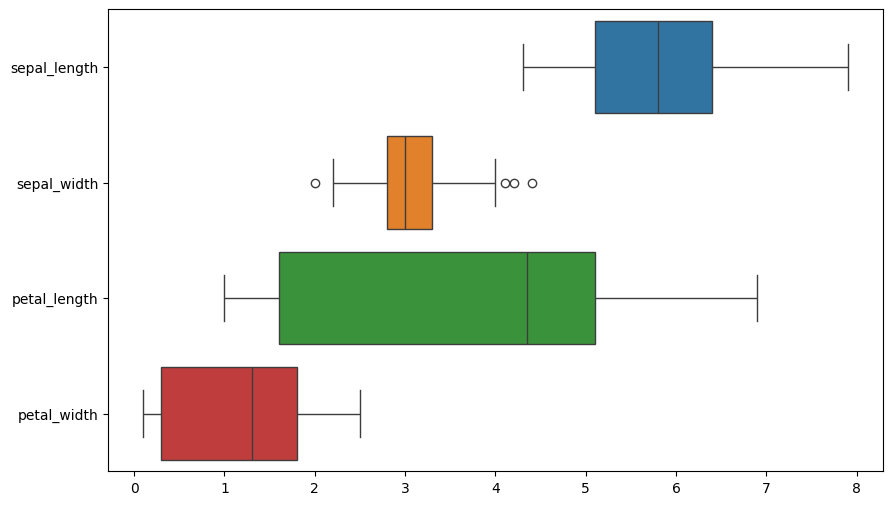

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h")
plt.show()


In [57]:
colors=['red','blue','yellow']
unique_species= data['species'].unique()
unique_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

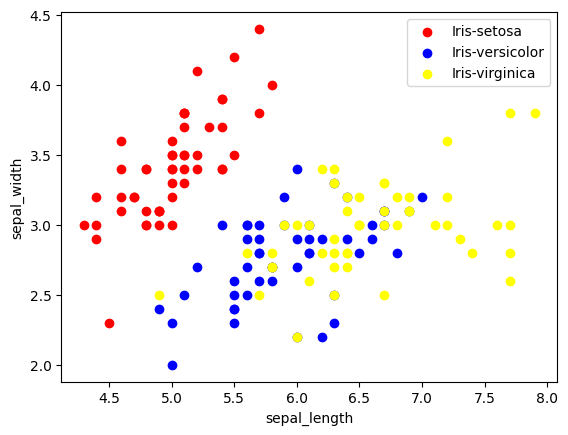

In [58]:
color_map={species:color for species, color in zip(unique_species, colors)}
for species in unique_species:
  x= data[data['species']==species]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=color_map[species],label=species)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()




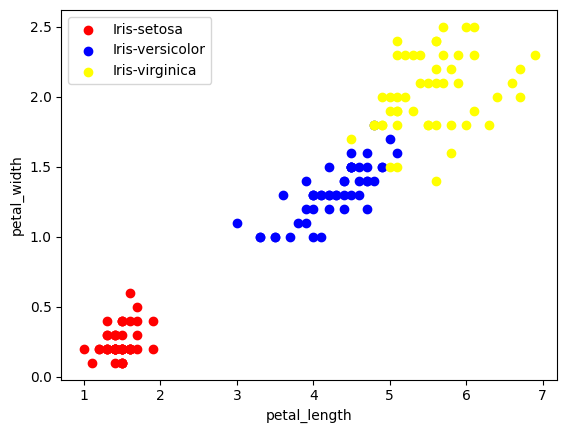

In [59]:
color_map={species:color for species, color in zip(unique_species, colors)}
for species in unique_species:
  x= data[data['species']==species]
  plt.scatter(x['petal_length'],x['petal_width'],c=color_map[species],label=species)

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

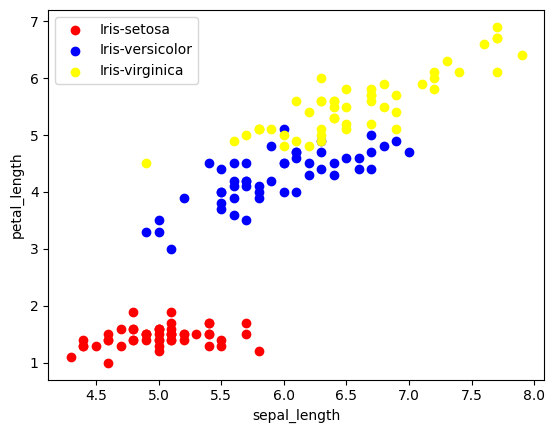

In [60]:
color_map={species:color for species, color in zip(unique_species, colors)}
for species in unique_species:
  x= data[data['species']==species]
  plt.scatter(x['sepal_length'],x['petal_length'],c=color_map[species],label=species)

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

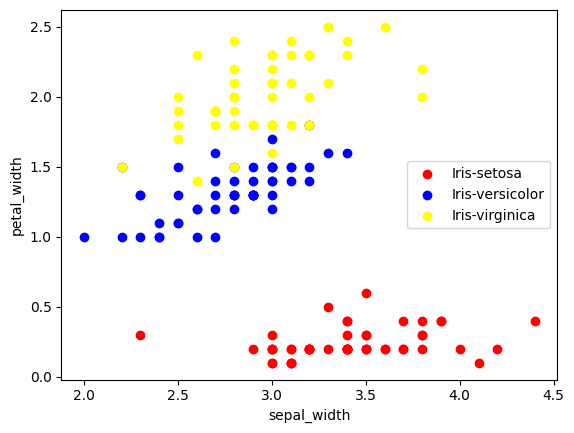

In [61]:
color_map={species:color for species, color in zip(unique_species, colors)}
for species in unique_species:
  x= data[data['species']==species]
  plt.scatter(x['sepal_width'],x['petal_width'],c=color_map[species],label=species)

plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()
plt.show()

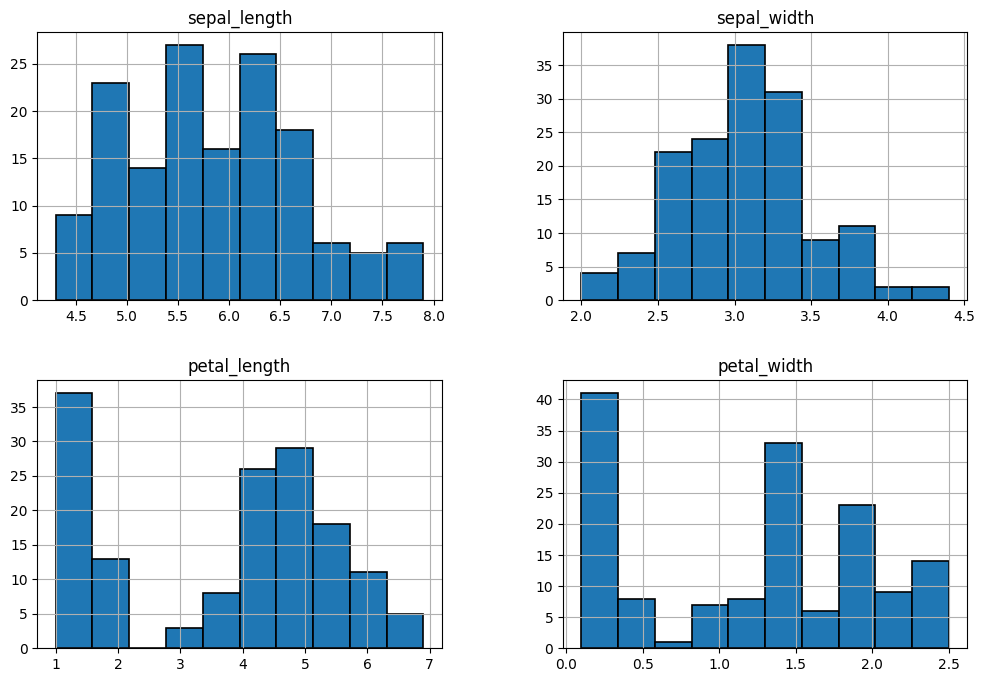

In [62]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.show()


In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [66]:
data['species']=le.fit_transform(data['species'])

In [67]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

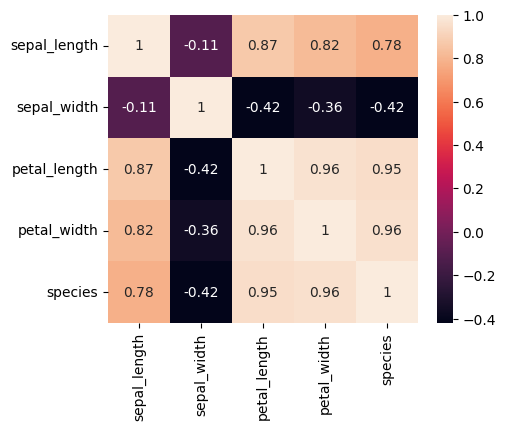

In [68]:
corr= data.corr()
fig, ax=plt.subplots(figsize= (5,4))
sns.heatmap(corr, annot=True, ax=ax)


In [69]:
from sklearn.model_selection import train_test_split


In [71]:
X=data.drop(columns=['species'])
Y=data['species']
x_train, x_test,y_train, y_test= train_test_split(X,Y,test_size=0.30)

In [72]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [73]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
print("Accuracy: ",model.score(x_test,y_test))

Accuracy:  0.9777777777777777
